# Definitions of xG Analysis

## xgoals (xG) Definition

The expected goals (xG) are the number of goals that can be expected to be scored based on where and how a shot was taken. In this code the xG data for the 21/22 season were obtained from <a href="https://understat.com/league/EPL/2021">understat</a>.

## xgoals Difference (ΔxG) Definition 

The xgoals difference (ΔxG) corresponds to the difference between the xG of a team minus the xG of the opponent on a particular match, i.e.  $\Delta xG=xG-xG_{allowed}$. This is a qualitative metric that in reality represents how much better was the team in question in a particular match.

## Mean xgoals Difference (ΔxG<sub>m</sub>) Definition 

The mean xgoals difference $\Delta xG_m$ corresponds to the mean value of the ΔxG metric. This metric corresponds to a specific number that shows how much better was the team in question from its opponent throughout the 21/22 season.

# Directories & Data

## Libraries 

In [1]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

## Directories 

In [2]:
# Specify the directory for Manchester United
directory_mu='C:/Users/user1/Desktop/Documents/Projects/Sport Project/data/Manchester United_all.xlsx'
# Specify the directory for Manchester City
directory_mc='C:/Users/user1/Desktop/Documents/Projects/Sport Project/data/Manchester City_all.xlsx'
# Specify the directory for Liverpool
directory_liv='C:/Users/user1/Desktop/Documents/Projects/Sport Project/data/Liverpool_all.xlsx'

## Options for Plots 

In [3]:
# The width of each bar in the Bar Plots that follow
width = 0.25
# x Axis Labels for all Bar Plot that follow
x_ticks = x_ticks=[str(x) for x in range(1,39)]
x_axis = np.arange(len(x_ticks))

# y Axis Labels for the Bar Plot of Manchester United
y_ticks_mu = ['0','1','2','3','4','5']
y_axis_mu = np.arange(len(y_ticks_mu)) 
# y Axis Labels for the Bar Plot of Manchester City
y_ticks_mc = ['0','1','2','3','4','5','6','7']
y_axis_mc = np.arange(len(y_ticks_mc))  
# y Axis Labels for the Bar Plot of Liverpool
y_ticks_liv = ['0','1','2','3','4','5','6']
y_axis_liv = np.arange(len(y_ticks_liv))  

# Manchester United - xG Analysis

### Basic Info of Data 

In [4]:
# import the data for Manchester United
dfmu=pd.read_excel(directory_mu)
dfmu.info()
dfmu.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Matchweek       38 non-null     int64  
 1   Goals_scored    38 non-null     int64  
 2   xgoals          38 non-null     float64
 3   Goals_concede   38 non-null     int64  
 4   xgoals_allowed  38 non-null     float64
 5   vs              38 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.9+ KB


,Matchweek,Goals_scored,xgoals,Goals_concede,xgoals_allowed
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,19.500000,1.500000,1.505526,1.500000,1.501842
std,11.113055,1.330515,0.719499,1.370539,0.903315
min,1.000000,0.000000,0.110000,0.000000,0.240000
25%,10.250000,1.000000,0.907500,1.000000,0.702500
50%,19.500000,1.000000,1.655000,1.000000,1.295000
75%,28.750000,2.750000,1.922500,2.000000,2.070000
max,38.000000,5.000000,2.990000,5.000000,4.050000


### Calculation of the Basic Quantities

In [5]:
# Create lists for each variable
matchweek=dfmu['Matchweek']
goals_scored_mu=dfmu['Goals_scored']
xgoals_mu=dfmu['xgoals']
goals_concede_mu=dfmu['Goals_concede']
xgoals_allowed_mu=dfmu['xgoals_allowed']
vs_mu=dfmu['vs']

In [6]:
# Calculate the sums of each list
xgoals_sum_mu=sum(xgoals_mu)
xgoals_sum_mu_frmt="{:.2f}".format(xgoals_sum_mu)
goals_sum_mu=sum(goals_scored_mu)
goals_sum_mu_frmt="{:.0f}".format(goals_sum_mu)

Recall that the xgoal difference (ΔxG) corresponds to dxg that is defined as $\Delta xG=xG-xG_{allowed}$

In [7]:
# Calculate the xgoal difference ΔxG
dxg_mu=dfmu.xgoals - dfmu.xgoals_allowed
# Calculate the number of matches in which ΔxG>0
dxg_pos_mu=len([index for index in dxg_mu if index >= 0])
# Calculate the number of matches in which ΔxG<0
dxg_neg_mu=len([index for index in dxg_mu if index <= 0])
# Find the percentage where ΔxG>0 
chances_mu=100*dxg_pos_mu/len(matchweek)
chances_mu_frmt="{:.2f}".format(chances_mu)
print("Manchester United in the 21/22 season according to the xG analysis should had scored",xgoals_sum_mu_frmt,"and scored",goals_sum_mu,"goals.")
print("Manchester United in the 21/22 season according to the xG analysis created better chances in",chances_mu_frmt,"% of the total matches.")

Manchester United in the 21/22 season according to the xG analysis should had scored 57.21 and scored 57 goals.
Manchester United in the 21/22 season according to the xG analysis created better chances in 52.63 % of the total matches.


In [8]:
# Select only the matches vs top 4 league teams
dfmu_top4=dfmu[dfmu['vs'].str.contains('Manchester_City|Chelsea|Liverpool|Tottenham')]
# Calculate the sums of each list
xgoals_mu_top4=dfmu_top4['xgoals']
xgoals_allowed_mu_top4=dfmu_top4['xgoals_allowed']
# Calculate the xgoal difference ΔxG
dxg_mu_top4=xgoals_mu_top4-xgoals_allowed_mu_top4
# Calculate the number of matches in which ΔxG>0
dxg_mu_top4_pos=len([index for index in dxg_mu_top4 if index >= 0])
# Find the percentage where ΔxG>0
chances_mu_top4=100*dxg_mu_top4_pos/len(dfmu_top4)
chances_mu_top4_frmt="{:.1f}".format(chances_mu_top4)
print("Manchester United in the 21/22 season according to the xG analysis had ΔxG>0 against top 4 league teams in",chances_mu_top4_frmt,"%  of the total matches given.")

Manchester United in the 21/22 season according to the xG analysis had ΔxG>0 against top 4 league teams in 12.5 %  of the total matches given.


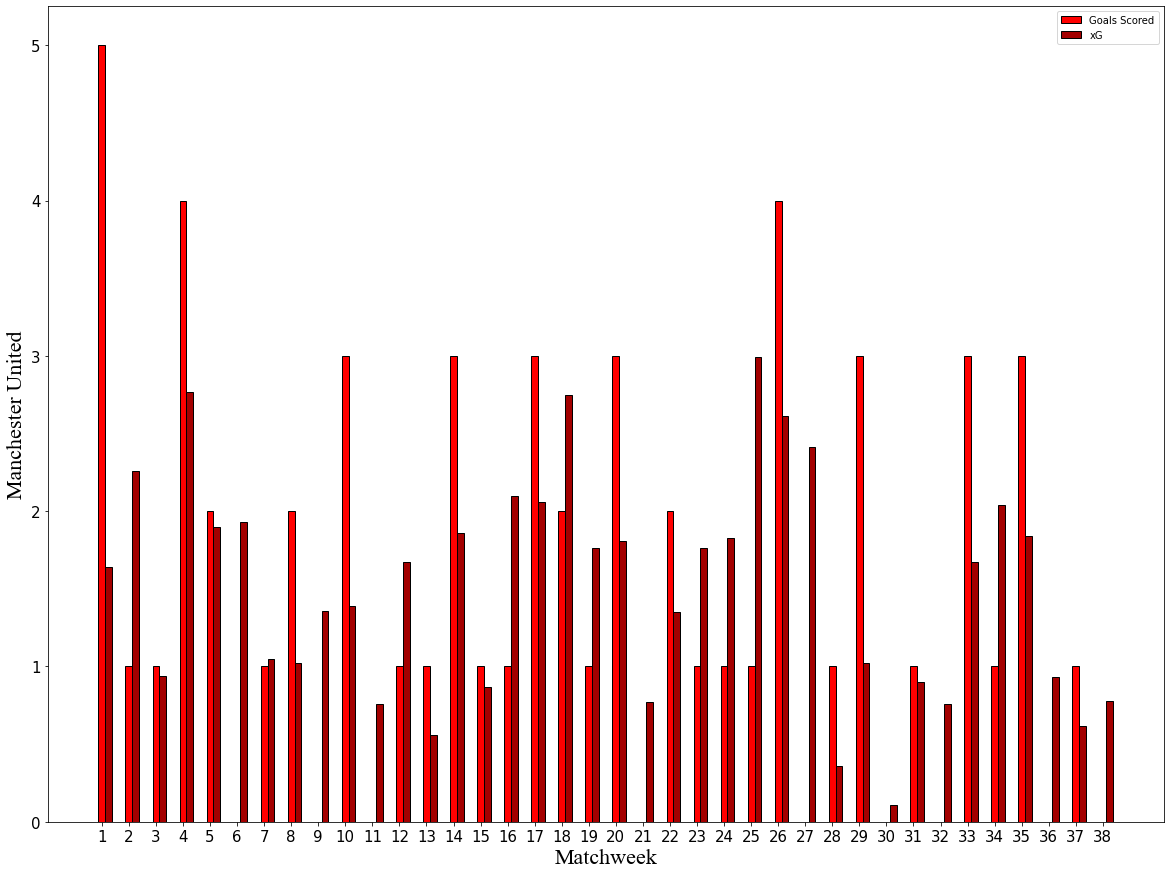

In [9]:
# Bar Plot for Manchester United
n=len(matchweek)
x = np.arange(n) 

# Size of the Figure
plt.rcParams["figure.figsize"] = (20, 15)
    
plt.bar(x, goals_scored_mu, color = 'r',
        width = width, edgecolor = 'black',
        label='Goals Scored')

plt.bar(x + width, xgoals_mu, color = (0.64, 0, 0),
        width = width, edgecolor = 'black',
        label='xG')
  
plt.xticks(x_axis, x_ticks, fontsize = 15)   
plt.yticks(y_axis_mu, y_ticks_mu, fontsize = 15)   
plt.xlabel("Matchweek", fontdict = {'family':'Times New Roman','size':22})
plt.ylabel("Manchester United", fontdict = {'family':'Times New Roman','size':22})

plt.legend()
plt.show()

# Manchester City - xG Analysis 

### Basic Info of Data 

In [10]:
# import the data for Manchester City
dfmc=pd.read_excel(directory_mc)
dfmc.info()
dfmc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Matchweek       38 non-null     int64  
 1   Goals_scored    38 non-null     int64  
 2   xgoals          38 non-null     float64
 3   Goals_concede   38 non-null     int64  
 4   xgoals_allowed  38 non-null     float64
 5   vs              38 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.9+ KB


,Matchweek,Goals_scored,xgoals,Goals_concede,xgoals_allowed
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,19.500000,2.605263,2.457632,0.684211,0.663947
std,11.113055,1.793976,1.054259,0.903604,0.525483
min,1.000000,0.000000,0.660000,0.000000,0.030000
25%,10.250000,1.000000,1.645000,0.000000,0.242500
50%,19.500000,2.000000,2.240000,0.000000,0.550000
75%,28.750000,4.000000,3.317500,1.000000,1.000000
max,38.000000,7.000000,4.470000,3.000000,2.430000


### Calculation of the Basic Quantities

In [11]:
# Create lists for each variable
goals_scored_mc=dfmc['Goals_scored']
xgoals_mc=dfmc['xgoals']
goals_concede_mc=dfmc['Goals_concede']
xgoals_allowed_mc=dfmc['xgoals_allowed']
vs_mc=dfmc['vs']

In [12]:
# Calculate the sums of each list
xgoals_sum_mc=sum(xgoals_mc)
xgoals_sum_mc_frmt="{:.2f}".format(xgoals_sum_mc)
goals_sum_mc=sum(goals_scored_mc)
goals_sum_mc_frmt="{:.0f}".format(goals_sum_mc)

Recall that the xgoal difference (ΔxG) corresponds to dxg that is defined as $\Delta xG=xG-xG_{allowed}$

In [13]:
# Calculate the xgoal difference ΔxG
dxg_mc=dfmc.xgoals - dfmc.xgoals_allowed
# Calculate the number of matches in which ΔxG>0
dxg_pos_mc=len([index for index in dxg_mc if index >= 0])
# Calculate the number of matches in which ΔxG<0
dxg_neg_mc=len([index for index in dxg_mc if index <= 0])
# Find the percentage where ΔxG>0 
chances_mc=100*dxg_pos_mc/len(matchweek)
chances_mc_frmt="{:.2f}".format(chances_mc)
print("Manchester City in the 21/22 season according to the xG analysis should had scored",xgoals_sum_mc_frmt,"and scored",goals_sum_mc,"goals.")
print("Manchester City in the 21/22 season according to the xG analysis created better chances in",chances_mc_frmt,"% of the total matches.")

Manchester City in the 21/22 season according to the xG analysis should had scored 93.39 and scored 99 goals.
Manchester City in the 21/22 season according to the xG analysis created better chances in 97.37 % of the total matches.


In [14]:
# Select only the matches vs top 4 league teams
dfmc_top4=dfmc[dfmc['vs'].str.contains('Manchester_United|Chelsea|Liverpool|Tottenham')]
# Calculate the sums of each list
xgoals_mc_top4=dfmc_top4['xgoals']
xgoals_allowed_mc_top4=dfmc_top4['xgoals_allowed']
# Calculate the xgoal difference ΔxG
dxg_mc_top4=xgoals_mc_top4-xgoals_allowed_mc_top4
# Calculate the number of matches in which ΔxG>0
dxg_mc_top4_pos=len([index for index in dxg_mc_top4 if index >= 0])
# Find the percentage where ΔxG>0
chances_mc_top4=100*dxg_mc_top4_pos/len(dfmc_top4)
chances_mc_top4_frmt="{:.1f}".format(chances_mc_top4)
print("Manchester City in the 21/22 season according to the xG analysis had ΔxG>0 against top 4 league teams in",chances_mc_top4_frmt,"%  of the total matches given.")

Manchester City in the 21/22 season according to the xG analysis had ΔxG>0 against top 4 league teams in 100.0 %  of the total matches given.


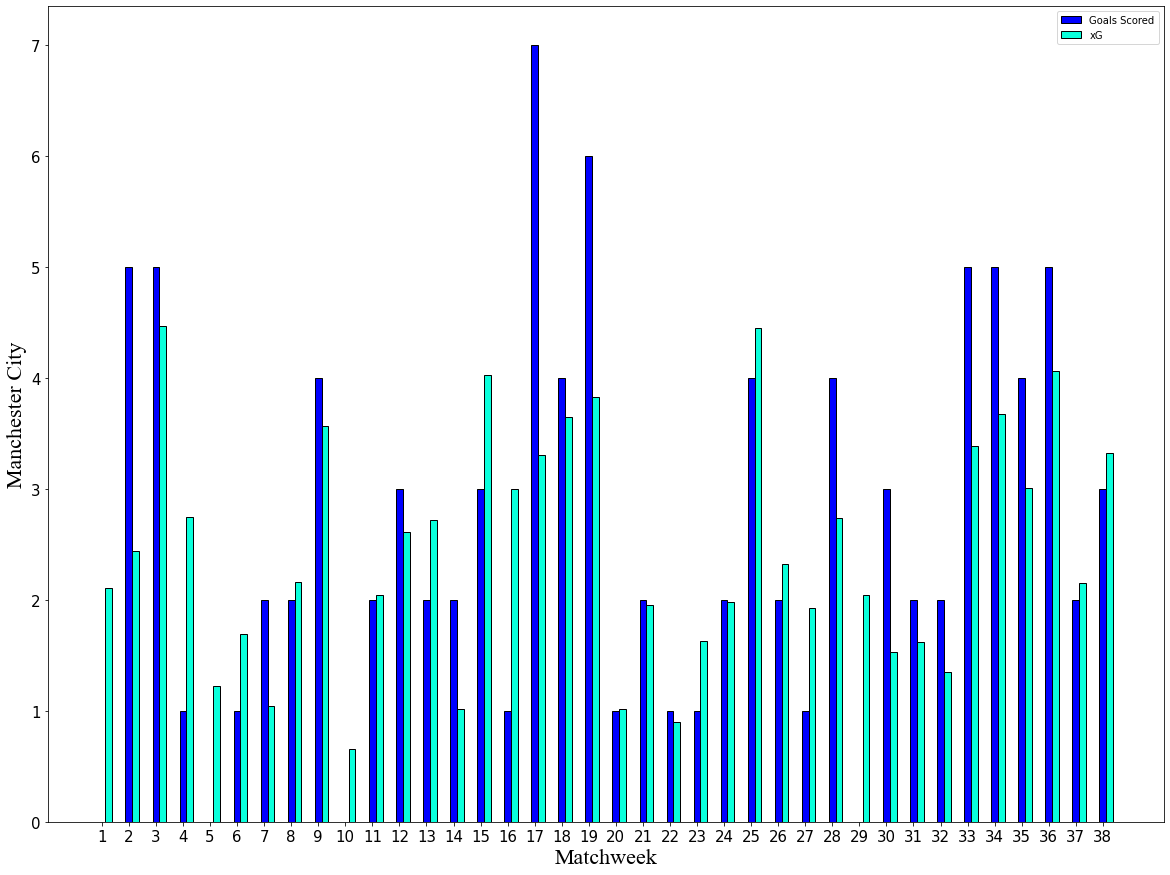

In [15]:
# Bar Plot for Manchester City    
plt.bar(x, goals_scored_mc, color = 'b',
        width = width, edgecolor = 'black',
        label='Goals Scored')

plt.bar(x + width, xgoals_mc, color = (0.04, 1., 0.86),
        width = width, edgecolor = 'black',
        label='xG')
  
plt.xticks(x_axis, x_ticks, fontsize = 15)   
plt.yticks(y_axis_mc, y_ticks_mc, fontsize = 15)   
plt.xlabel("Matchweek", fontdict = {'family':'Times New Roman','size':22})
plt.ylabel("Manchester City", fontdict = {'family':'Times New Roman','size':22})

plt.legend()
plt.show()

# Liverpool - xG Analysis  

### Basic Info of Data 

In [16]:
# import the data for Liverpool
dfliv=pd.read_excel(directory_liv)
dfliv.info()
dfliv.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Matchweek       38 non-null     int64  
 1   Goals_scored    38 non-null     int64  
 2   xgoals          38 non-null     float64
 3   Goals_concede   38 non-null     int64  
 4   xgoals_allowed  38 non-null     float64
 5   vs              38 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.9+ KB


,Matchweek,Goals_scored,xgoals,Goals_concede,xgoals_allowed
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,19.500000,2.500000,2.442368,0.657895,0.866842
std,11.113055,1.289249,1.000171,0.847136,0.672406
min,1.000000,0.000000,0.950000,0.000000,0.100000
25%,10.250000,2.000000,1.712500,0.000000,0.390000
50%,19.500000,2.000000,2.340000,0.000000,0.660000
75%,28.750000,3.000000,2.920000,1.000000,1.337500
max,38.000000,6.000000,5.330000,3.000000,2.940000


### Calculation of the Basic Quantities

In [17]:
# Create lists for each variable
goals_scored_liv=dfliv['Goals_scored']
xgoals_liv=dfliv['xgoals']
goals_concede_liv=dfliv['Goals_concede']
xgoals_allowed_liv=dfliv['xgoals_allowed']
vs_liv=dfliv['vs']

In [18]:
# Calculate the sums of each list
xgoals_sum_liv=sum(xgoals_liv)
xgoals_sum_liv_frmt="{:.2f}".format(xgoals_sum_liv)
goals_sum_liv=sum(goals_scored_liv)
goals_sum_liv_frmt="{:.0f}".format(goals_sum_liv)

Recall that the xgoal difference (ΔxG) corresponds to dxg that is defined as $\Delta xG=xG-xG_{allowed}$

In [19]:
# Calculate the xgoal difference ΔxG
dxg_liv=dfliv.xgoals - dfliv.xgoals_allowed
# Calculate the number of matches in which ΔxG>0
dxg_pos_liv=len([index for index in dxg_liv if index >= 0])
# Calculate the number of matches in which ΔxG<0
dxg_neg_liv=len([index for index in dxg_liv if index <= 0])
# Find the percentage where ΔxG>0 
chances_liv=100*dxg_pos_liv/len(matchweek)
chances_liv_frmt="{:.2f}".format(chances_liv)
print("Liverpool in the 21/22 season according to the xG analysis should had scored",xgoals_sum_liv_frmt,"and scored",goals_sum_liv,"goals.")
print("Liverpool in the 21/22 season according to the xG analysis created better chances in",chances_liv_frmt,"% of the total matches.")

Liverpool in the 21/22 season according to the xG analysis should had scored 92.81 and scored 95 goals.
Liverpool in the 21/22 season according to the xG analysis created better chances in 81.58 % of the total matches.


In [20]:
# Select only the matches vs top 4 league teams
dfliv_top4=dfliv[dfliv['vs'].str.contains('Manchester_United|Chelsea|Manchester_City|Tottenham')]
# Calculate the sums of each list
xgoals_liv_top4=dfliv_top4['xgoals']
xgoals_allowed_liv_top4=dfliv_top4['xgoals_allowed']
# Calculate the xgoal difference ΔxG
dxg_liv_top4=xgoals_liv_top4-xgoals_allowed_liv_top4
# Calculate the number of matches in which ΔxG>0
dxg_liv_top4_pos=len([index for index in dxg_liv_top4 if index >= 0])
# Find the percentage where ΔxG>0
chances_liv_top4=100*dxg_liv_top4_pos/len(dfliv_top4)
chances_liv_top4_frmt="{:.1f}".format(chances_liv_top4)
print("Liverpool in the 21/22 season according to the xG analysis had ΔxG>0 against top 4 league teams in",chances_liv_top4_frmt,"%  of the total matches given.")

Liverpool in the 21/22 season according to the xG analysis had ΔxG>0 against top 4 league teams in 62.5 %  of the total matches given.


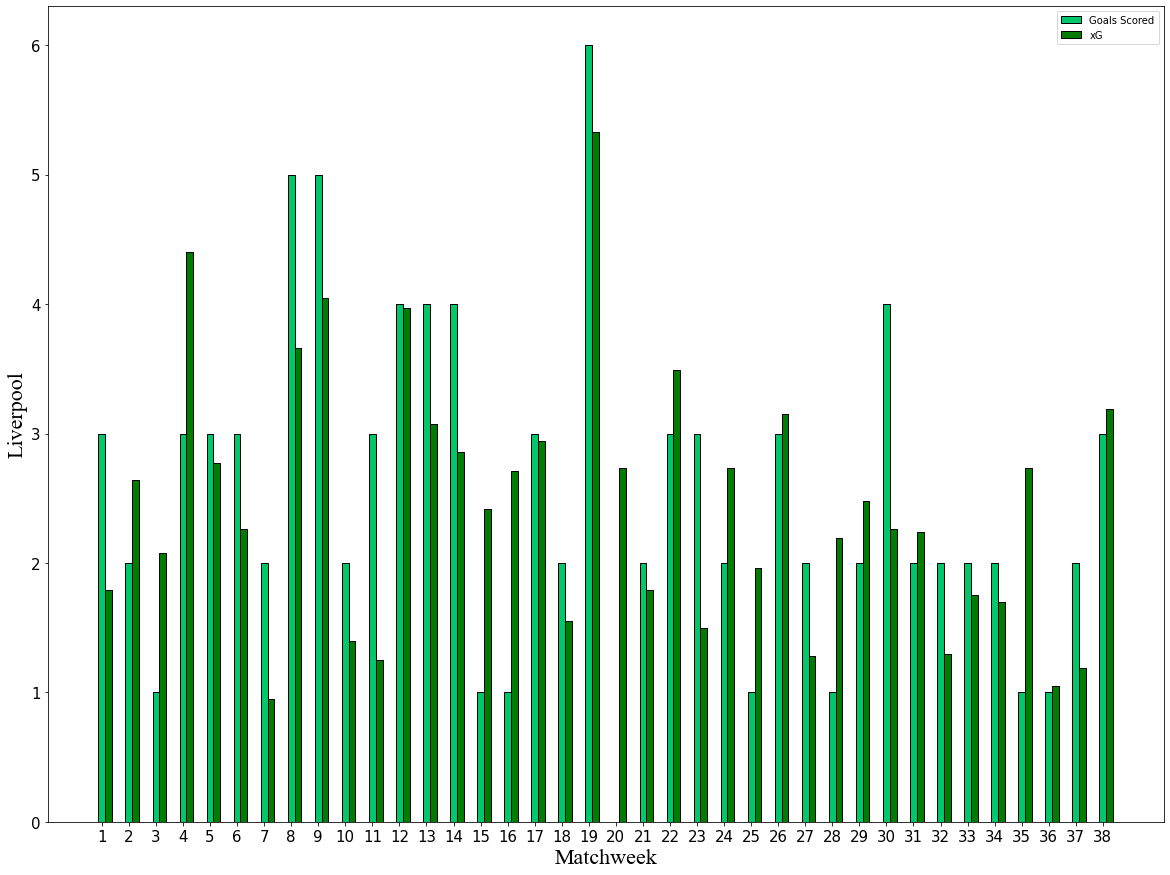

In [21]:
# Bar Plot for Liverpool
plt.bar(x, goals_scored_liv, color = (0, 0.78, 0.41),
        width = width, edgecolor = 'black',
        label='Goals Scored')

plt.bar(x + width, xgoals_liv, color = (0, 0.49, 0),
        width = width, edgecolor = 'black',
        label='xG')
  
plt.xticks(x_axis, x_ticks, fontsize = 15)   
plt.yticks(y_axis_liv, y_ticks_liv, fontsize = 15)   
plt.xlabel("Matchweek", fontdict = {'family':'Times New Roman','size':22})
plt.ylabel("Liverpool", fontdict = {'family':'Times New Roman','size':22})

plt.legend()
plt.show()

# Combined Plots - xG Analysis

### Pie Chart Plot

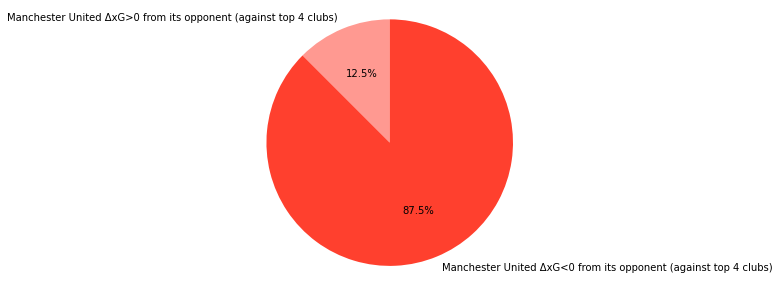

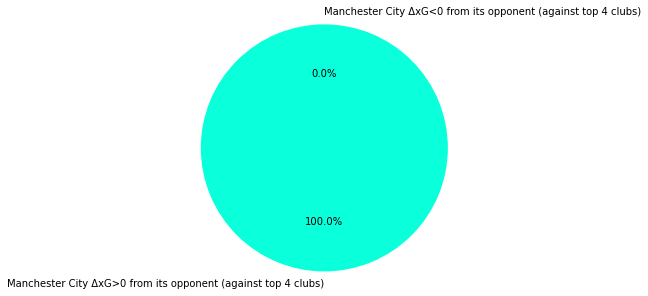

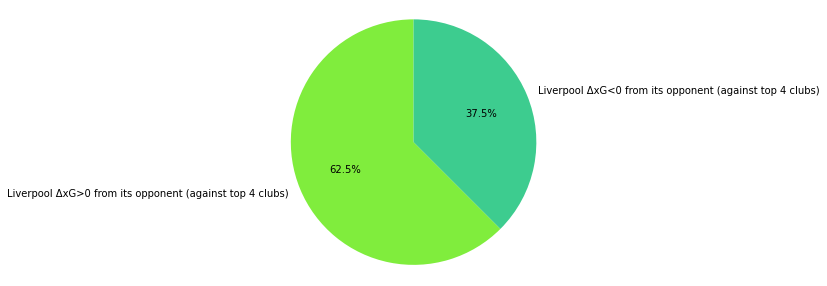

In [22]:
# Pie chart for Manchester United
labelsmu = 'Manchester United ΔxG>0 from its opponent (against top 4 clubs)', 'Manchester United ΔxG<0 from its opponent (against top 4 clubs)'
chancesmu = [chances_mu_top4,100-chances_mu_top4]
colorsmu = [(1., 0.6, 0.57), (1., 0.25, 0.18)] 
labelsmc = 'Manchester City ΔxG>0 from its opponent (against top 4 clubs)', 'Manchester City ΔxG<0 from its opponent (against top 4 clubs)'
chancesmc = [chances_mc_top4,100-chances_mc_top4]
colorsmc = [(0.04, 1., 0.86), 'b'] 
labelsliv = 'Liverpool ΔxG>0 from its opponent (against top 4 clubs)', 'Liverpool ΔxG<0 from its opponent (against top 4 clubs)'
chancesliv = [chances_liv_top4,100-chances_liv_top4]
colorsliv = [(0.5, 0.93, 0.24), (0.24, 0.8, 0.56)] 
plt.rcParams["figure.figsize"] = (10, 5) 

fig1, ax1 = plt.subplots()
ax1.pie(chancesmu, labels=labelsmu, colors=colorsmu, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig2, ax2 = plt.subplots()
ax2.pie(chancesmc, labels=labelsmc, colors=colorsmc, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig3, ax3 = plt.subplots()
ax3.pie(chancesliv, labels=labelsliv, colors=colorsliv, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### ΔxG Plot 

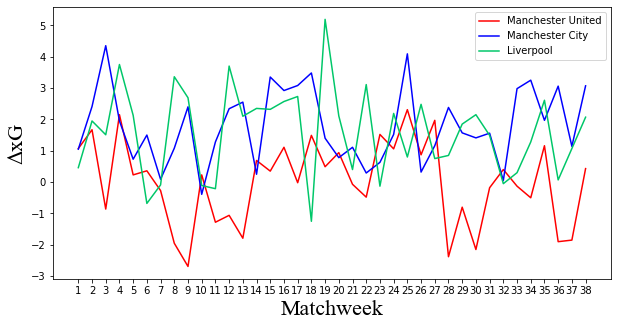

In [25]:
y1_mu = dxg_mu
y2_mc = dxg_mc
y3_liv = dxg_liv

plt.xticks(x_axis, x_ticks, fontsize = 10)   
plt.xlabel("Matchweek", fontdict = {'family':'Times New Roman','size':22})
plt.ylabel("ΔxG", fontdict = {'family':'Times New Roman','size':22})

plt.plot(x, y1_mu, color='r', label='Manchester United')
plt.plot(x, y2_mc, color='b', label='Manchester City')
plt.plot(x, y3_liv, color=(0, 0.78, 0.41), label='Liverpool')
plt.legend()

### ΔxG<sub>m</sub> Plot

In [26]:
# Calculate the Mean Values of the three teams
mean_mu=stat.mean(dxg_mu)
mean_mc=stat.mean(dxg_mc)
mean_liv=stat.mean(dxg_liv)

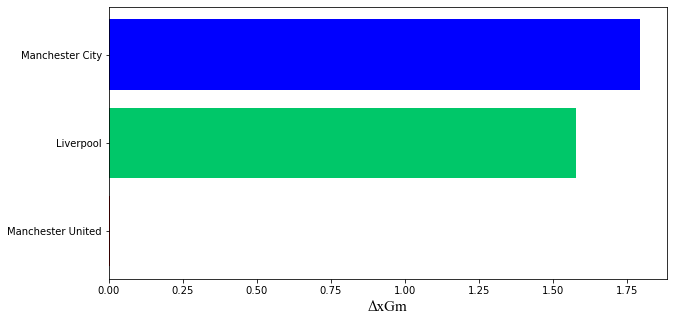

In [27]:
x_axis_mean = np.array(['Manchester United', 'Liverpool', 'Manchester City'])
y_axis_mean = np.array([mean_mu,mean_liv,mean_mc])
color = ['red', (0, 0.78, 0.41), 'blue']

plt.xlabel("ΔxGm",fontdict = {'family':'Times New Roman','size':15})

plt.barh(x_axis_mean, y_axis_mean, color = color)
plt.show()